In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

import numpy as np

In [3]:
print(tf.__version__)

2.17.0


In [13]:
# train data 
# t_data = 2*x1 -3*x2 + 2*x3

x_data = np.array([ [1, 2, 0], [5, 4, 3], [1, 2, -1], [3, 1, 0], [2, 4, 2], 
                    [4, 1, 2], [-1, 3, 2], [4, 3, 3], [0, 2, 6], [2, 2, 1],
                    [1, -2, -2], [0, 1, 3], [1, 1, 3], [0, 1, 4], [2, 3, 3] ])

t_data = np.array([-4, 4, -6, 3, -4, 
                   9, -7, 5, 6, 0,
                   4, 3, 5, 5, 1])


In [15]:
print('x_data.shape = ', x_data.shape, ', t_data.shape = ', t_data.shape)

x_data.shape =  (15, 3) , t_data.shape =  (15,)


In [19]:
# Linear Regression 을 keras 이용하여 생성
model = Sequential()

In [21]:
# Dense layer를 추가할 때, input_shape는 처음에 한 번만 지정
model.add(Dense(1, input_shape=(3,), activation='linear'))

In [27]:
# 학습을 위한 optimizer, 손실함수 정의
model.compile(optimizer=SGD(learning_rate=1e-2), loss='mse')

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:

from datetime import datetime
start_time = datetime.now()
hist = model.fit(x_data, t_data, epochs=1000)
end_time = datetime.now()
print('\nElapsed Time => ', end_time - start_time)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 23.7983
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.2427
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.8423
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 19.5667
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.3961
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.3164
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.3172
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.3899
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.5276
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.7242
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.9744
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.2734
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.6173
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.0023
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.4251
Ep

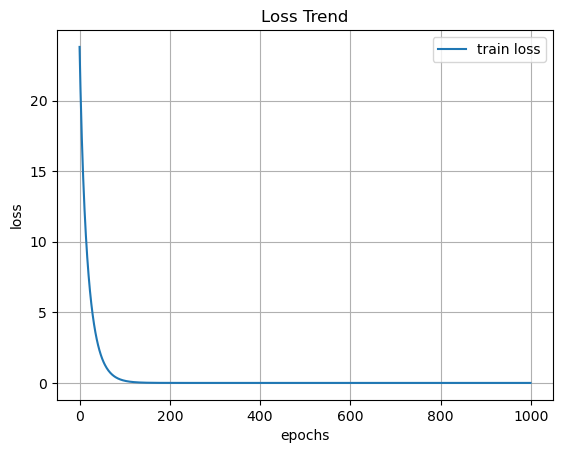

In [37]:
##모델 손실함수 추세
import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'],label='train loss') #측정지표 metric=['loss']항목은 기본으로 지정되어 hist.history['loss']로 저장된
plt.legend(loc='best')